In [12]:
import sys
print(sys.version)

import torch

# 当前安装的 PyTorch 库的版本
print(torch.__version__)
# 检查 CUDA 是否可用，即你的系统有 NVIDIA 的 GPU
print(torch.backends.mps.is_available()) #检查mps是否可用

3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
2.5.1
False


In [13]:
"""
PyTorch 线性回归
线性回归是最基本的机器学习算法之一，用于预测一个连续值。

线性回归是一种简单且常见的回归分析方法，目的是通过拟合一个线性函数来预测输出。

对于一个简单的线性回归问题，模型可以表示为：
y = w1x1 + w2x2 + ... + wnxn + b

y 是预测值（目标值）。
x1，x2，xn 是输入特征。
w1，w2，wn是待学习的权重（模型参数）。
b 是偏置项。
"""

'\nPyTorch 线性回归\n线性回归是最基本的机器学习算法之一，用于预测一个连续值。\n\n线性回归是一种简单且常见的回归分析方法，目的是通过拟合一个线性函数来预测输出。\n\n对于一个简单的线性回归问题，模型可以表示为：\ny = w1x1 + w2x2 + ... + wnxn + b\n\ny 是预测值（目标值）。\nx1，x2，xn 是输入特征。\nw1，w2，wn是待学习的权重（模型参数）。\nb 是偏置项。\n'

In [14]:
"""
数据准备
我们首先准备一些假数据，用于训练我们的线性回归模型。这里，我们可以生成一个简单的线性关系的数据集，其中每个样本有两个特征 x1，x2。
"""

import torch
import numpy as np
import matplotlib.pyplot as plt

# 随机种子，确保每次运行结果一致
torch.manual_seed(42)

# 生成训练数据
X = torch.randn(100, 2)  # 100 个样本，每个样本 2 个特征
true_w = torch.tensor([2.0, 3.0])  # 假设真实权重
true_b = 4.0  # 偏置项
Y = X @ true_w + true_b + torch.randn(100) * 0.1  # 加入一些噪声

# 打印部分数据
print(X[:5])
print(Y[:5])

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487]])
tensor([12.4460, -0.4663,  1.7666, -0.9357,  7.4781])


In [15]:
"""
定义线性回归模型
我们可以通过继承 nn.Module 来定义一个简单的线性回归模型。在 PyTorch 中，线性回归的核心是 nn.Linear() 层，它会自动处理权重和偏置的初始化。
"""

import torch.nn as nn

# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 定义一个线性层，输入为2个特征，输出为1个预测值
        self.linear = nn.Linear(2, 1)  # 输入维度2，输出维度1
    
    def forward(self, x):
        return self.linear(x)  # 前向传播，返回预测结果

# 创建模型实例
model = LinearRegressionModel()

"""
这里的 nn.Linear(2, 1) 表示一个线性层，它有 2 个输入特征和 1 个输出。forward 方法定义了如何通过这个层进行前向传播。
"""

'\n这里的 nn.Linear(2, 1) 表示一个线性层，它有 2 个输入特征和 1 个输出。forward 方法定义了如何通过这个层进行前向传播。\n'

In [16]:
"""
定义损失函数与优化器
线性回归的常见损失函数是 均方误差损失（MSELoss），用于衡量预测值与真实值之间的差异。PyTorch 中提供了现成的 MSELoss 函数。

我们将使用 SGD（随机梯度下降） 或 Adam 优化器来最小化损失函数。
"""

# 损失函数（均方误差）
criterion = nn.MSELoss()

# 优化器（使用 SGD 或 Adam）
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率设置为0.01

"""
MSELoss：计算预测值与真实值的均方误差。
SGD：使用随机梯度下降法更新参数。
"""

'\nMSELoss：计算预测值与真实值的均方误差。\nSGD：使用随机梯度下降法更新参数。\n'

In [22]:
"""
训练模型
在训练过程中，我们将执行以下步骤：

使用输入数据 X 进行前向传播，得到预测值。
计算损失（预测值与实际值之间的差异）。
使用反向传播计算梯度。
更新模型参数（权重和偏置）。
我们将训练模型 1000 轮，并在每 100 轮打印一次损失。
"""

# 训练模型
num_epochs = 1000  # 训练 1000 轮
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式

    # 前向传播
    predictions = model(X)  # 模型输出预测值
    #print('1------>', X[: 1])
    #print('2------>', predictions[: 1])
    #print('3------>', predictions.squeeze()[:1])

    loss = criterion(predictions.squeeze(), Y)  # 计算损失（注意预测值需要压缩为1D）

    # 反向传播
    optimizer.zero_grad()  # 清空之前的梯度
    loss.backward()  # 计算梯度
    optimizer.step()  # 更新模型参数

    # 打印损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

"""
predictions.squeeze()：我们在这里将模型的输出从 2D 张量压缩为 1D，因为目标值 Y 是一个一维数组。
optimizer.zero_grad()：每次反向传播前需要清空之前的梯度。
loss.backward()：计算梯度。
optimizer.step()：更新权重和偏置。
"""

Epoch [100/1000], Loss: 0.0081
Epoch [200/1000], Loss: 0.0081
Epoch [300/1000], Loss: 0.0081
Epoch [400/1000], Loss: 0.0081
Epoch [500/1000], Loss: 0.0081
Epoch [600/1000], Loss: 0.0081
Epoch [700/1000], Loss: 0.0081
Epoch [800/1000], Loss: 0.0081
Epoch [900/1000], Loss: 0.0081
Epoch [1000/1000], Loss: 0.0081


'\npredictions.squeeze()：我们在这里将模型的输出从 2D 张量压缩为 1D，因为目标值 Y 是一个一维数组。\noptimizer.zero_grad()：每次反向传播前需要清空之前的梯度。\nloss.backward()：计算梯度。\noptimizer.step()：更新权重和偏置。\n'

Predicted weight: [[0.54602575 2.2769208 ]]
Predicted bias: [-0.65046823]


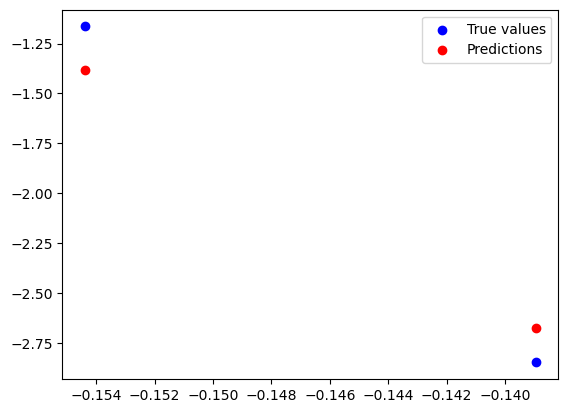

In [10]:
"""
评估模型
训练完成后，我们可以通过查看模型的权重和偏置来评估模型的效果。我们还可以在新的数据上进行预测并与实际值进行比较。
"""

# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

# 在新数据上做预测
with torch.no_grad():  # 评估时不需要计算梯度
    predictions = model(X)

# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()

"""
model.linear.weight.data 和 model.linear.bias.data：这些属性存储了模型的权重和偏置。
torch.no_grad()：在评估模式下，不需要计算梯度，节省内存。
"""

Epoch [100/1000], Loss: 0.4292
Epoch [200/1000], Loss: 0.0152
Epoch [300/1000], Loss: 0.0084
Epoch [400/1000], Loss: 0.0081
Epoch [500/1000], Loss: 0.0081
Epoch [600/1000], Loss: 0.0081
Epoch [700/1000], Loss: 0.0081
Epoch [800/1000], Loss: 0.0081
Epoch [900/1000], Loss: 0.0081
Epoch [1000/1000], Loss: 0.0081
Predicted weight: [[2.009702  2.9986038]]
Predicted bias: [4.020908]


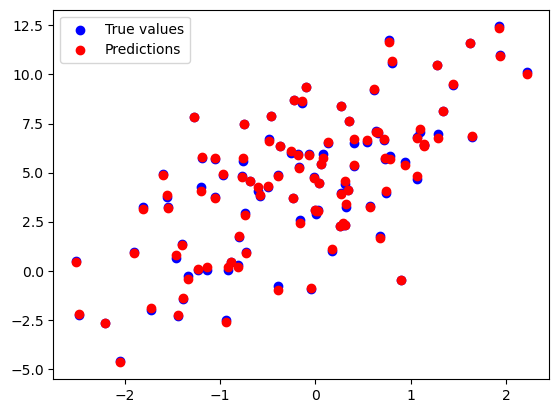

In [23]:
"""
完整代码
"""

import torch.nn as nn

# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 定义一个线性层，输入为2个特征，输出为1个预测值
        self.linear = nn.Linear(2, 1)  # 输入维度2，输出维度1
    
    def forward(self, x):
        return self.linear(x)  # 前向传播，返回预测结果

# 创建模型实例
model = LinearRegressionModel()

# 损失函数（均方误差）
criterion = nn.MSELoss()

# 优化器（使用 SGD 或 Adam）
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率设置为0.01

# 训练模型
num_epochs = 1000  # 训练 1000 轮
for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式

    # 前向传播
    predictions = model(X)  # 模型输出预测值
    loss = criterion(predictions.squeeze(), Y)  # 计算损失（注意预测值需要压缩为1D）

    # 反向传播
    optimizer.zero_grad()  # 清空之前的梯度
    loss.backward()  # 计算梯度
    optimizer.step()  # 更新模型参数

    # 打印损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

# 查看训练后的权重和偏置
print(f'Predicted weight: {model.linear.weight.data.numpy()}')
print(f'Predicted bias: {model.linear.bias.data.numpy()}')

# 在新数据上做预测
with torch.no_grad():  # 评估时不需要计算梯度
    predictions = model(X)

# 可视化预测与实际值
plt.scatter(X[:, 0], Y, color='blue', label='True values')
plt.scatter(X[:, 0], predictions, color='red', label='Predictions')
plt.legend()
plt.show()